In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [ ]:
# split the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

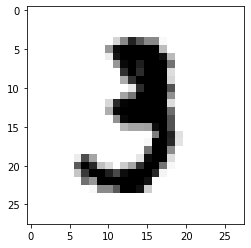

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap = plt.cm.binary)

In [ ]:
X_train.min()
X_train.max()

255

In [ ]:
# normalize the pixel values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
# set up the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# compile and fit the model
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test), batch_size = 32, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1509 - accuracy: 0.7844 - val_loss: 0.0836 - val_accuracy: 0.8976
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0727 - accuracy: 0.9041 - val_loss: 0.0602 - val_accuracy: 0.9250
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0574 - accuracy: 0.9219 - val_loss: 0.0502 - val_accuracy: 0.9336
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0493 - accuracy: 0.9321 - val_loss: 0.0441 - val_accuracy: 0.9401
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0438 - accuracy: 0.9399 - val_loss: 0.0398 - val_accuracy: 0.9463
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0397 - accuracy: 0.9454 - val_loss: 0.0366 - val_accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0364 - accuracy: 0.9499 - val_loss: 0.0336 -

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test,verbose=1)

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0276 - accuracy: 0.9643
Test accuracy: 0.964
Train accuracy: 0.962
